Least RMS approximation method using backpropagation of error.

It shows how coefficient balancing is going depending
on learning step h

In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import random as rnd

In [55]:
def generate_polynomial_noise_data(w, u,  N =1000):
    #continious uniform distribution [-1, 1]
    x = [2*(rnd.random()-0.5) for i in range(N)]
    
    #polinomial with noraml noise
    y = [sum([w[i]*xi**i for i in range(len(w))])+ rnd.normalvariate(0,u)for xi in x]
    return x,y

def generate_polynomial_data(w, x_min, x_max, N =1000):
    x = np.linspace(x_min,x_max,N)
    y = [sum([w[i]*xi**i for i in range(len(w))]) for xi in x]
    return x,y

def fwd_pred(w, x):
    return sum([w[i]*x**i for i in range(len(w))])

def batch_loss(w,x_batch, y_batch):
    p = [fwd_pred(w, xi) for xi in x_batch]
    p = np.array(p)
    y = np.array(y_batch)
    loss = np.mean(np.power((y - p),2))
    return np.around(loss, 2)

def plot_intermediate_result(x, y, w):
    plt.plot(x,y, '.')
    x2,y2 = generate_polynomial_data(w=w, x_min=min(x), x_max=max(x), N = 1000)
    plt.plot(x2,y2, '--')
    plt.show()

def bwd_prop(w0, x, y, h=0.000001, intermed = 20):
    W = []
    W.append(w0)
    K = len(x)//intermed
    for i in range(len(x)):
        #feedback
        if i%K == 0:
            print('loss: ', 
                  batch_loss(w=W[-1], x_batch=x[i: i+K//2], y_batch=y[i:i+K//2]),
                  'w = ',
                  np.around(W[-1],2))
            #plot_intermediate_result(x=x,y=y,w=W[-1])

        #################################
        
        er = 2*(y[i] - fwd_pred(w=W[-1],x=x[i]))*h
        
        w_new = []
        for j in range(len(w0)):
            w_new.append(W[-1][j] + er*x[i]**j)
        W.append(w_new)
    return W # list of polinomial coefficients

loss:  4.42 w =  [1 1 1 1 1]
loss:  4.58 w =  [-0.62 -0.43 -1.87 -0.41  1.09]
loss:  5.12 w =  [ 0.35 -1.98 -1.18 -1.99  4.67]
loss:  1.28 w =  [-0.76  0.83 -3.01 -1.87  5.32]
loss:  2.46 w =  [-0.21  0.83 -4.51 -1.46  5.66]
loss:  2.45 w =  [ 1.99  0.2  -5.73 -0.25  6.58]
loss:  0.5 w =  [ 0.56  0.31 -6.11  0.59  7.87]
loss:  0.65 w =  [ 0.47 -0.69 -5.71 -0.43  9.87]
loss:  1.2 w =  [-0.19  0.42 -7.04 -0.76  9.71]
loss:  1.74 w =  [ 1.45  0.66 -6.94  0.93 10.67]
loss:  3.7 w =  [ 0.48 -0.17 -9.26 -0.74  9.15]
loss:  0.4 w =  [ 1.13 -1.14 -9.56  1.37 10.47]
loss:  0.48 w =  [ 0.48 -0.87 -8.74  1.25 11.67]
loss:  0.14 w =  [ 0.84 -0.33 -8.94  0.64 12.47]
loss:  0.79 w =  [ 0.91 -0.96 -8.58 -0.14 13.45]
loss:  0.15 w =  [  0.89  -0.19 -10.05  -0.47  12.58]
loss:  0.13 w =  [ 0.49 -0.08 -9.32 -0.5  13.62]
loss:  0.1 w =  [  0.89  -0.   -10.03  -0.21  13.4 ]
loss:  0.05 w =  [  0.72  -0.25 -10.08  -0.07  13.85]
loss:  0.44 w =  [ 0.72  0.6  -9.88  0.25 14.49]
w_real [1, 0, -12, 0, 16] w_la

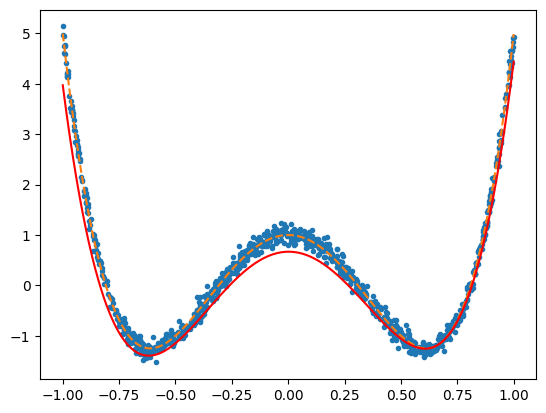

In [56]:
N =1000
w_real = [1,0,-8,0,8] # Cheb T4
w_real = [1,0,-12,0,16] # Cheb U4
h_learn = 0.34
#w_real = [0,6,0,-32,0,32] # Cheb U5
#h_learn = 0.1

intmed = 20    #amount of intermediate polynomials
sigma = 0.1
x, y  = generate_polynomial_noise_data(w=w_real, u=sigma, N=N)
x1,y1 = generate_polynomial_data(w = w_real, x_min=min(x), x_max=max(x), N = N)

w0 = [1 for _ in w_real]
w_net = bwd_prop(w0=w0, x=x, y=y, h=h_learn, intermed=intmed)
print('w_real', w_real, 'w_last', np.around(w_net[-1],2))

x2,y2 = generate_polynomial_data(w=w_net[-1], x_min=min(x), x_max=max(x), N = 1000)

plt.plot(x,y,'.')                      # original dataset
plt.plot(x1,y1,'--')                   # original polynome
plt.plot(x2,y2,'-', color='red')       # resulting polynome

plt.show()